In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv("battery_dataset.csv")  # Change filename if needed
df = df.drop(columns=['battery_id']).dropna()

# Select features and target
X = df[['cycle', 'disI', 'disV', 'disT']]
y_rul = df['RUL']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train_rul, X_test_rul, y_train_rul, y_test_rul = train_test_split(X_scaled, y_rul, test_size=0.2, random_state=42)

# Polynomial regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_rul, y_train_rul)

# Predict and evaluate
y_rul_poly_pred = poly_model.predict(X_test_rul)
mse_poly = mean_squared_error(y_test_rul, y_rul_poly_pred)
r2_poly = r2_score(y_test_rul, y_rul_poly_pred)

print(f"Polynomial Regression (RUL) - MSE: {mse_poly:.4f}")
print(f"Polynomial Regression (RUL) - R² Score: {r2_poly:.4f}")


Polynomial Regression (RUL) - MSE: 261.3674
Polynomial Regression (RUL) - R² Score: 0.9305


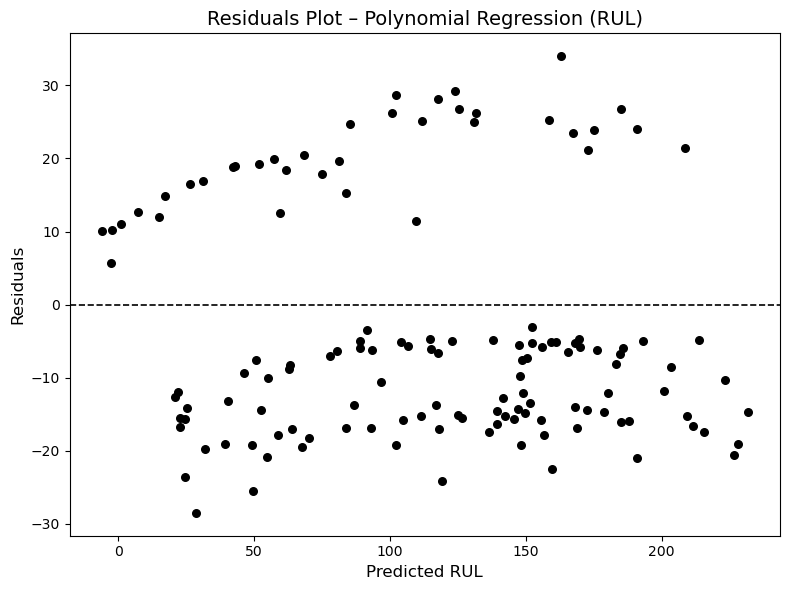

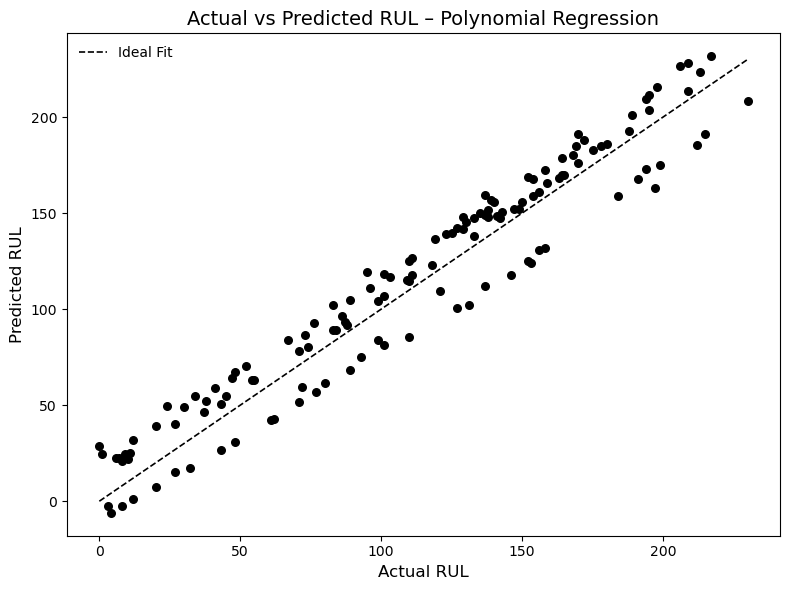

In [4]:
import matplotlib.pyplot as plt

# Calculate residuals for RUL polynomial model
rul_poly_residuals = y_test_rul - y_rul_poly_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_rul_poly_pred, rul_poly_residuals, color='black', s=30, alpha=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1.2)
plt.xlabel('Predicted RUL', fontsize=12, color='black')
plt.ylabel('Residuals', fontsize=12, color='black')
plt.title('Residuals Plot – Polynomial Regression (RUL)', fontsize=14, color='black')
plt.tick_params(colors='black')
plt.grid(False)
plt.tight_layout()
plt.show()

# Actual vs Predicted RUL (ideal line overlayed)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rul, y_rul_poly_pred, color='black', s=30, alpha=1)
plt.plot([y_test_rul.min(), y_test_rul.max()],
         [y_test_rul.min(), y_test_rul.max()],
         color='black', linestyle='--', linewidth=1.2, label='Ideal Fit')

plt.xlabel('Actual RUL', fontsize=12, color='black')
plt.ylabel('Predicted RUL', fontsize=12, color='black')
plt.title('Actual vs Predicted RUL – Polynomial Regression', fontsize=14, color='black')
plt.tick_params(colors='black')
plt.legend(frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()
